### Capstone Project Part 3;


In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

import folium # plotting library
from geopy.geocoders import Nominatim

In [3]:
from sklearn.cluster import KMeans 
import json

In [4]:
from pandas.io.json import json_normalize

In [5]:
radius = 1000

In [6]:
LIMIT=200

In [7]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [8]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_cities_in_Germany_by_population')[0]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   2015rank               79 non-null     int64 
 1   City                   79 non-null     object
 2   State                  79 non-null     object
 3   2015estimate           79 non-null     int64 
 4   2011census             79 non-null     int64 
 5   Change                 79 non-null     object
 6   2015land area          79 non-null     object
 7   2015populationdensity  79 non-null     object
 8   Location               79 non-null     object
dtypes: int64(3), object(6)
memory usage: 5.7+ KB


In [10]:
df[df['2011census'] > 500000]['City'].values

array(['Berlin', 'Hamburg', 'Munich (München)', 'Cologne (Köln)',
       'Frankfurt am Main', 'Stuttgart', 'Düsseldorf', 'Dortmund',
       'Essen', 'Leipzig', 'Bremen', 'Dresden', 'Hanover (Hannover)'],
      dtype=object)

In [11]:
mylist = ['Berlin', 'Hamburg', 'München', 'Köln',
       'Frankfurt am Main', 'Stuttgart', 'Düsseldorf', 'Dortmund',
       'Essen', 'Leipzig', 'Bremen', 'Dresden']

In [13]:
data = []
for i in mylist:

    geolocator = Nominatim(user_agent="is_explorer")
    location = geolocator.geocode(i)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(i,latitude, longitude))

    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
    results = requests.get(url).json()
    print('There are {} around Ecco restaurant.'.format(len(results['response']['groups'][0]['items'])))
    items = results['response']['groups'][0]['items']
    dataframe = json_normalize(items) # flatten JSON

    # filter columns
    filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]

    # filter the category for each row
    dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

    # clean columns
    dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

    #dataframe_filtered.head(10)
    data.append(dataframe_filtered)

The geograpical coordinate of Berlin are 52.5170365, 13.3888599.
There are 100 around Ecco restaurant.
The geograpical coordinate of Hamburg are 53.550341, 10.000654.


/Users/aydin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


There are 100 around Ecco restaurant.
The geograpical coordinate of München are 48.1371079, 11.5753822.
There are 100 around Ecco restaurant.
The geograpical coordinate of Köln are 50.938361, 6.959974.
There are 100 around Ecco restaurant.
The geograpical coordinate of Frankfurt am Main are 50.1106444, 8.6820917.
There are 100 around Ecco restaurant.
The geograpical coordinate of Stuttgart are 48.7784485, 9.1800132.
There are 100 around Ecco restaurant.
The geograpical coordinate of Düsseldorf are 51.2254018, 6.7763137.
There are 100 around Ecco restaurant.
The geograpical coordinate of Dortmund are 51.5142273, 7.4652789.
There are 100 around Ecco restaurant.
The geograpical coordinate of Essen are 51.4582235, 7.0158171.
There are 100 around Ecco restaurant.
The geograpical coordinate of Leipzig are 51.3406321, 12.3747329.
There are 100 around Ecco restaurant.
The geograpical coordinate of Bremen are 53.0758196, 8.8071646.
There are 100 around Ecco restaurant.
The geograpical coordinat

In [14]:
df = pd.concat(data)

In [15]:
df.head()

,name,categories,address,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,crossStreet,neighborhood,id
0,Dussmann das KulturKaufhaus,Bookstore,Friedrichstr. 90,52.518312,13.388708,"[{'label': 'display', 'lat': 52.518312, 'lng':...",142,10117,DE,Berlin,Berlin,Deutschland,"[Friedrichstr. 90, 10117 Berlin, Deutschland]",NaN,NaN,4adcda8ef964a520a74a21e3
1,Dussmann English Bookshop,Bookstore,Friedrichstr. 90,52.518223,13.389239,"[{'label': 'display', 'lat': 52.51822284368067...",134,10117,DE,Berlin,Berlin,Deutschland,"[Friedrichstr. 90, 10117 Berlin, Deutschland]",NaN,NaN,562a9474498e20b9ac65c6fe
2,Freundschaft,Wine Bar,Mittelstr. 1,52.518294,13.390344,"[{'label': 'display', 'lat': 52.51829373810599...",172,10117,DE,Berlin,Berlin,Deutschland,"[Mittelstr. 1 (Charlottenstr.), 10117 Berlin, ...",Charlottenstr.,NaN,5b85b8241fa763002ccd8cc3
3,Cookies Cream,Vegetarian / Vegan Restaurant,Behrenstr. 55,52.516569,13.388008,"[{'label': 'display', 'lat': 52.51656861215425...",77,10117,DE,Berlin,Berlin,Deutschland,"[Behrenstr. 55, 10117 Berlin, Deutschland]",NaN,NaN,4adf61aef964a520177a21e3
4,COS,Clothing Store,Friedrichstrasse 83,52.515947,13.389172,"[{'label': 'display', 'lat': 52.51594664962925...",123,10117,DE,Berlin,Berlin,Deutschland,"[Friedrichstrasse 83, 10117 Berlin, Deutschland]",NaN,NaN,4b4b65d9f964a5201a9a26e3


In [16]:
df.city.value_counts()

Bremen               100
Leipzig              100
Köln                 100
Essen                100
Dortmund             100
Frankfurt am Main    100
Hamburg               99
Stuttgart             99
München               99
Düsseldorf            99
Berlin                99
Dresden               98
Dresden-Altstadt       1
Name: city, dtype: int64

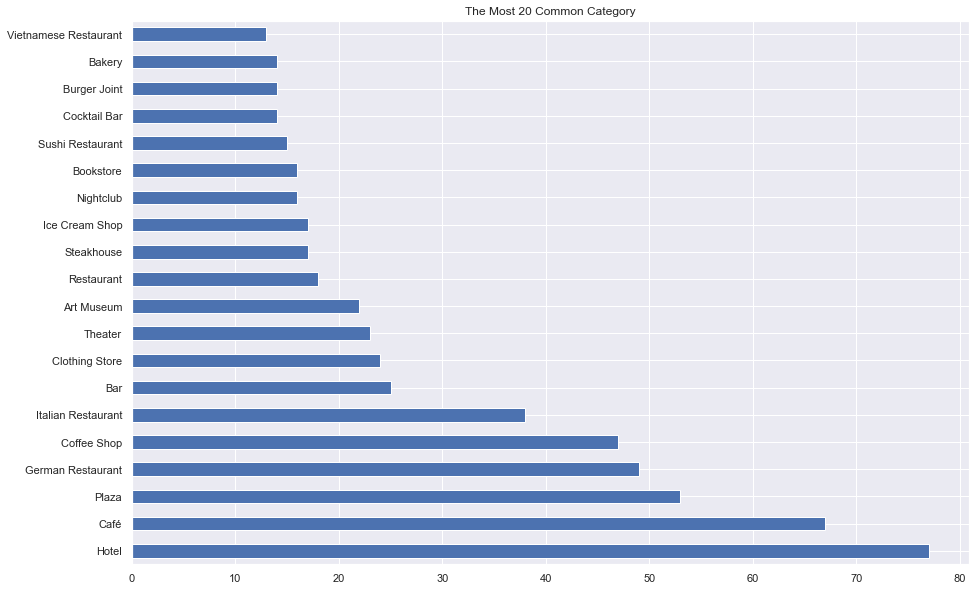

In [17]:
plt.figure(figsize=(15,10))
sns.set()
df.categories.value_counts().head(20).plot.barh()
plt.title('THE MOST 20 COMMON CATEGORY'.title())
plt.savefig('comman_cat.png')

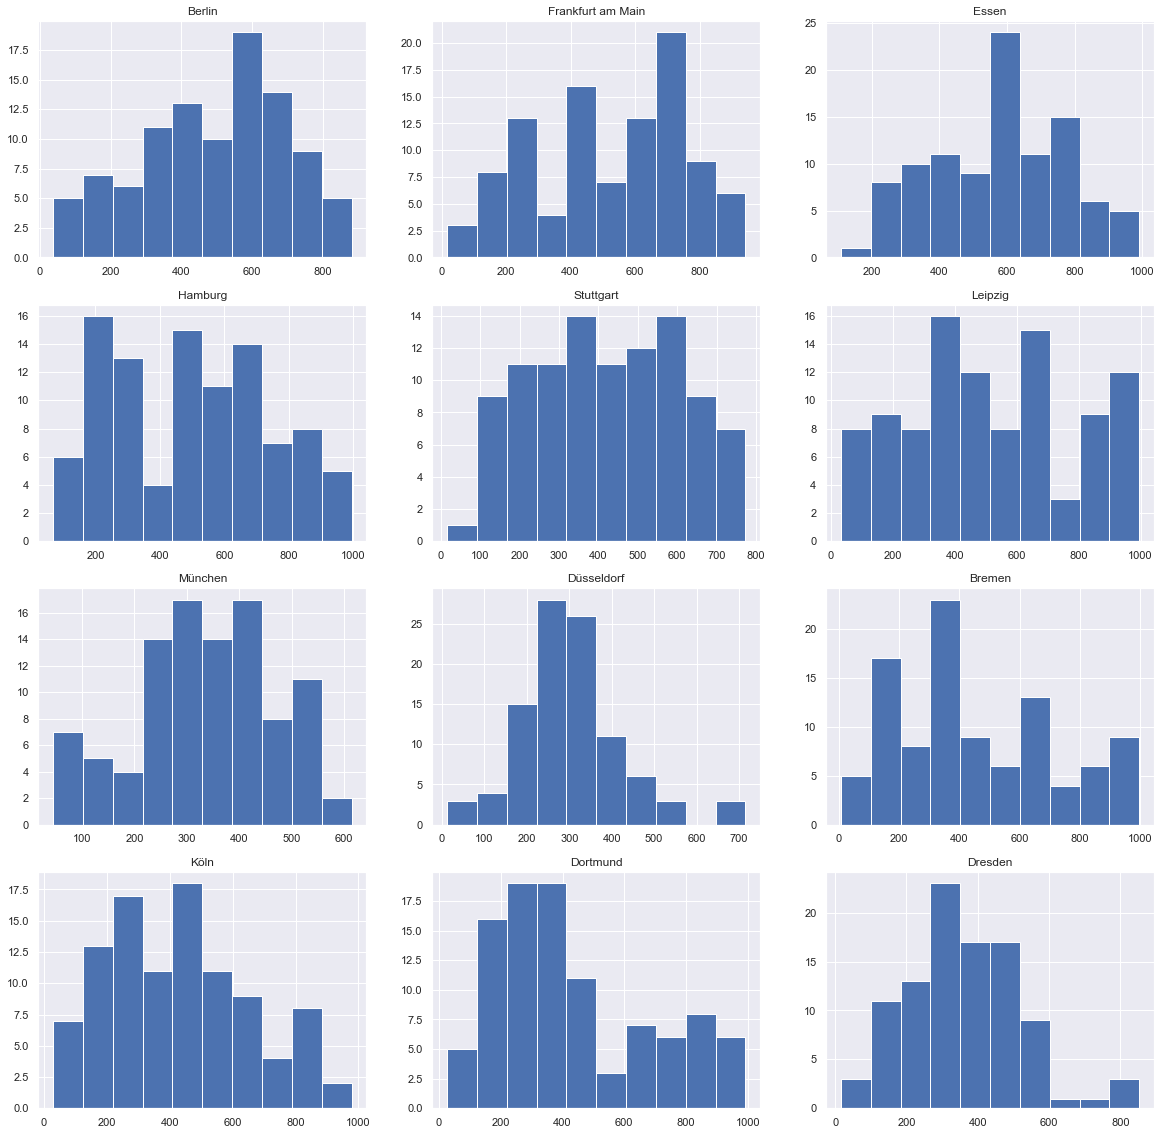

In [18]:
fig1, axs1 = plt.subplots(nrows=4, ncols=3, figsize=(20,20))
count = 0

for i in range(3):
    for j in range(4):
        axs1[j][i].hist(df[df['city']==mylist[count]]['distance'])
        axs1[j][i].set_title(mylist[count])
        count += 1

plt.savefig('dist_per_cities.png')
        

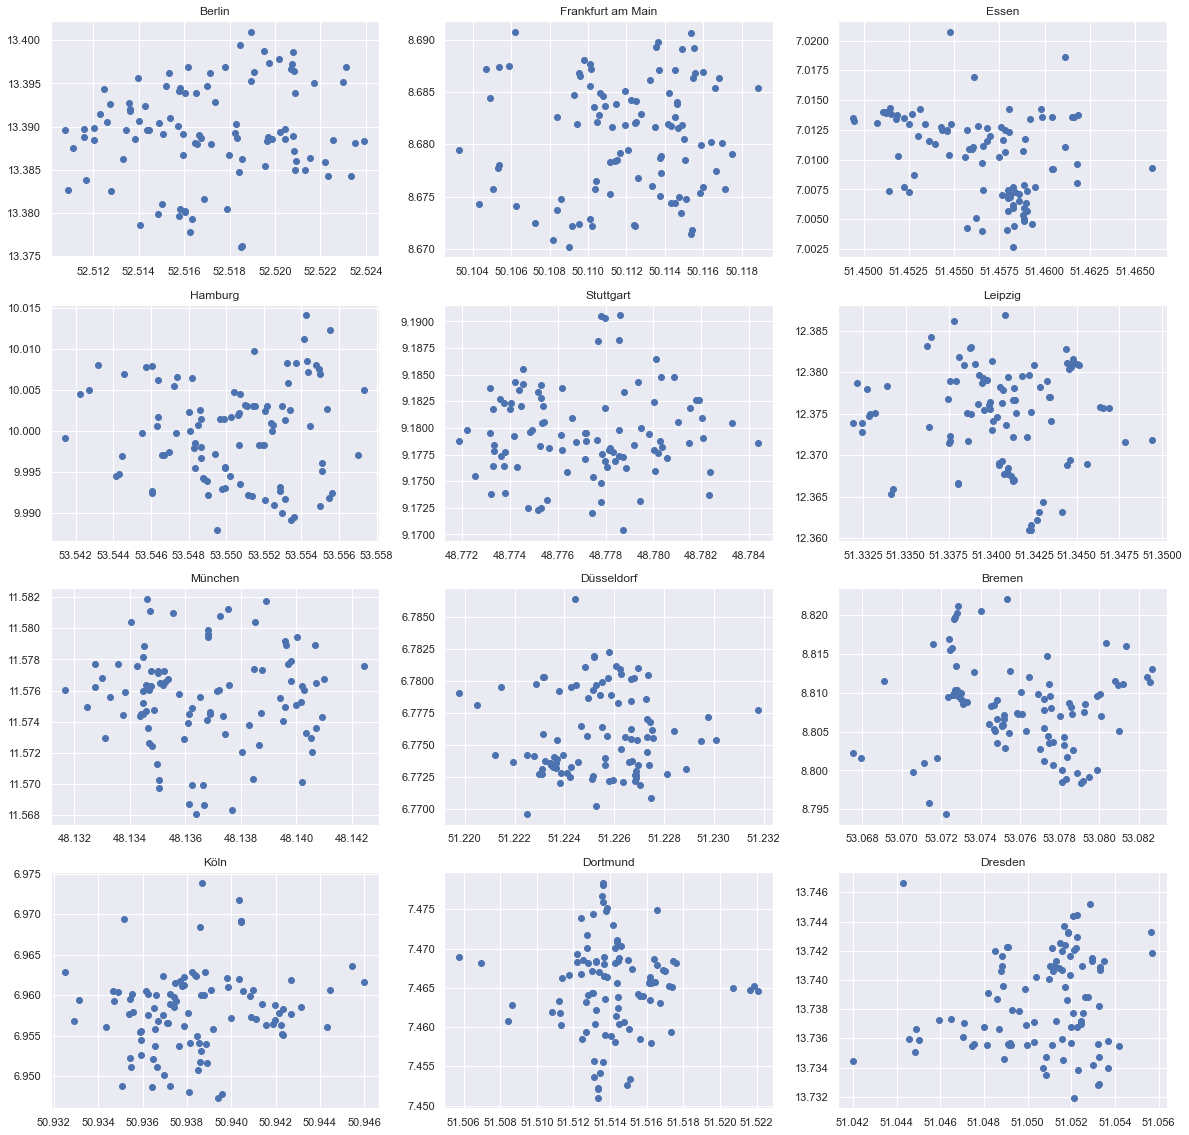

In [19]:
fig1, axs1 = plt.subplots(nrows=4, ncols=3, figsize=(20,20))
count = 0

for i in range(3):
    for j in range(4):
        axs1[j][i].scatter(data=df[df['city']==mylist[count]],x='lat',y='lng')
        axs1[j][i].set_title(mylist[count])
        count += 1
plt.savefig('scatter.png')

In [20]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

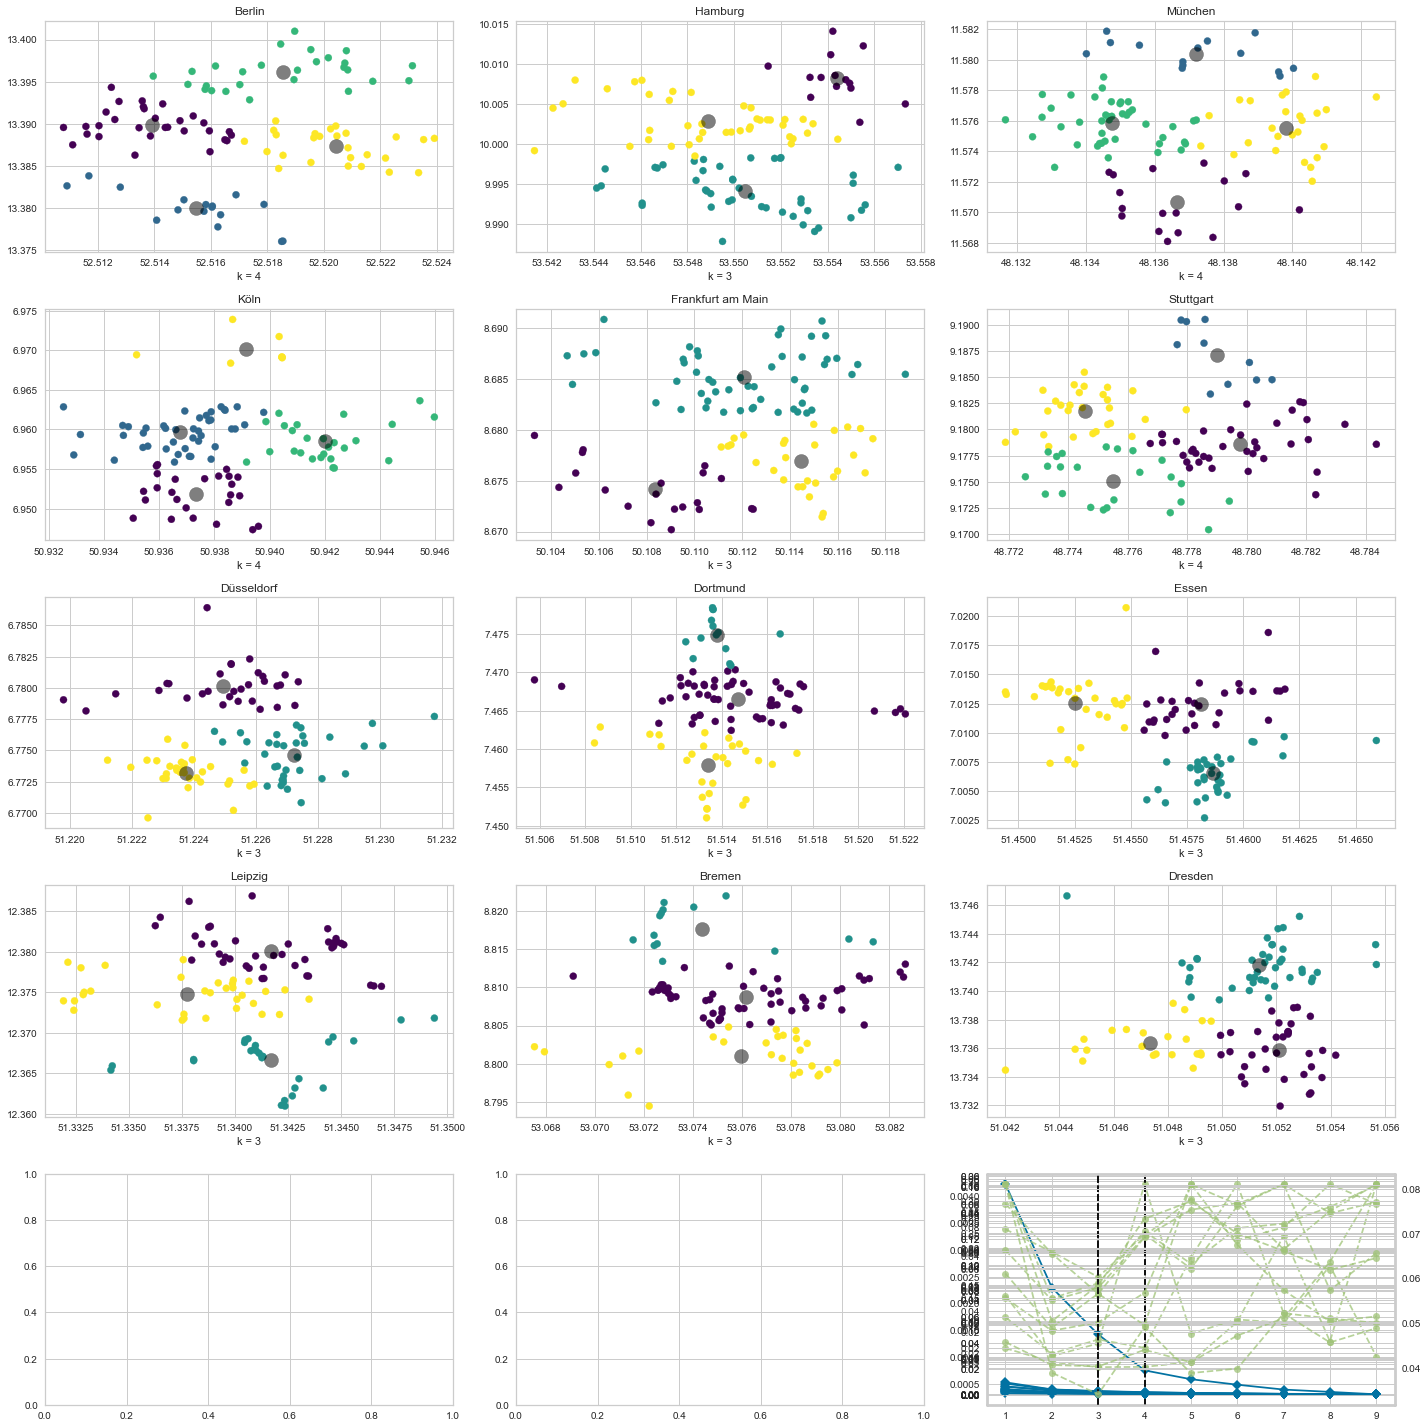

In [21]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

fig1, axs1 = plt.subplots(nrows=5, ncols=3, figsize=(20,20))
count = 0
kmeans = KMeans()
for i in range(5):
    if i == 4:
        break
    for j in range(3):
        data = df[df['city']==mylist[count]][['lat','lng']]
        scaler = StandardScaler()
        scaled_features = scaler.fit_transform(data)
        visu = KElbowVisualizer(kmeans, k = (1,10))
        visu.fit(data)
        k = visu.k_scores_.index(visu.elbow_score_)
        k += 1
        kmeans = KMeans()
        kmeans = KMeans(n_clusters = k).fit(data)
        axs1[i][j].scatter(data['lat'], data['lng'], c = kmeans.labels_, s = 50, cmap = "viridis")
        axs1[i][j].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black',alpha=0.5, label = 'Centroids')
        axs1[i][j].set_title(mylist[count])
        axs1[i][j].set_xlabel(f"k = {k}")
        count += 1
    
        
plt.tight_layout()


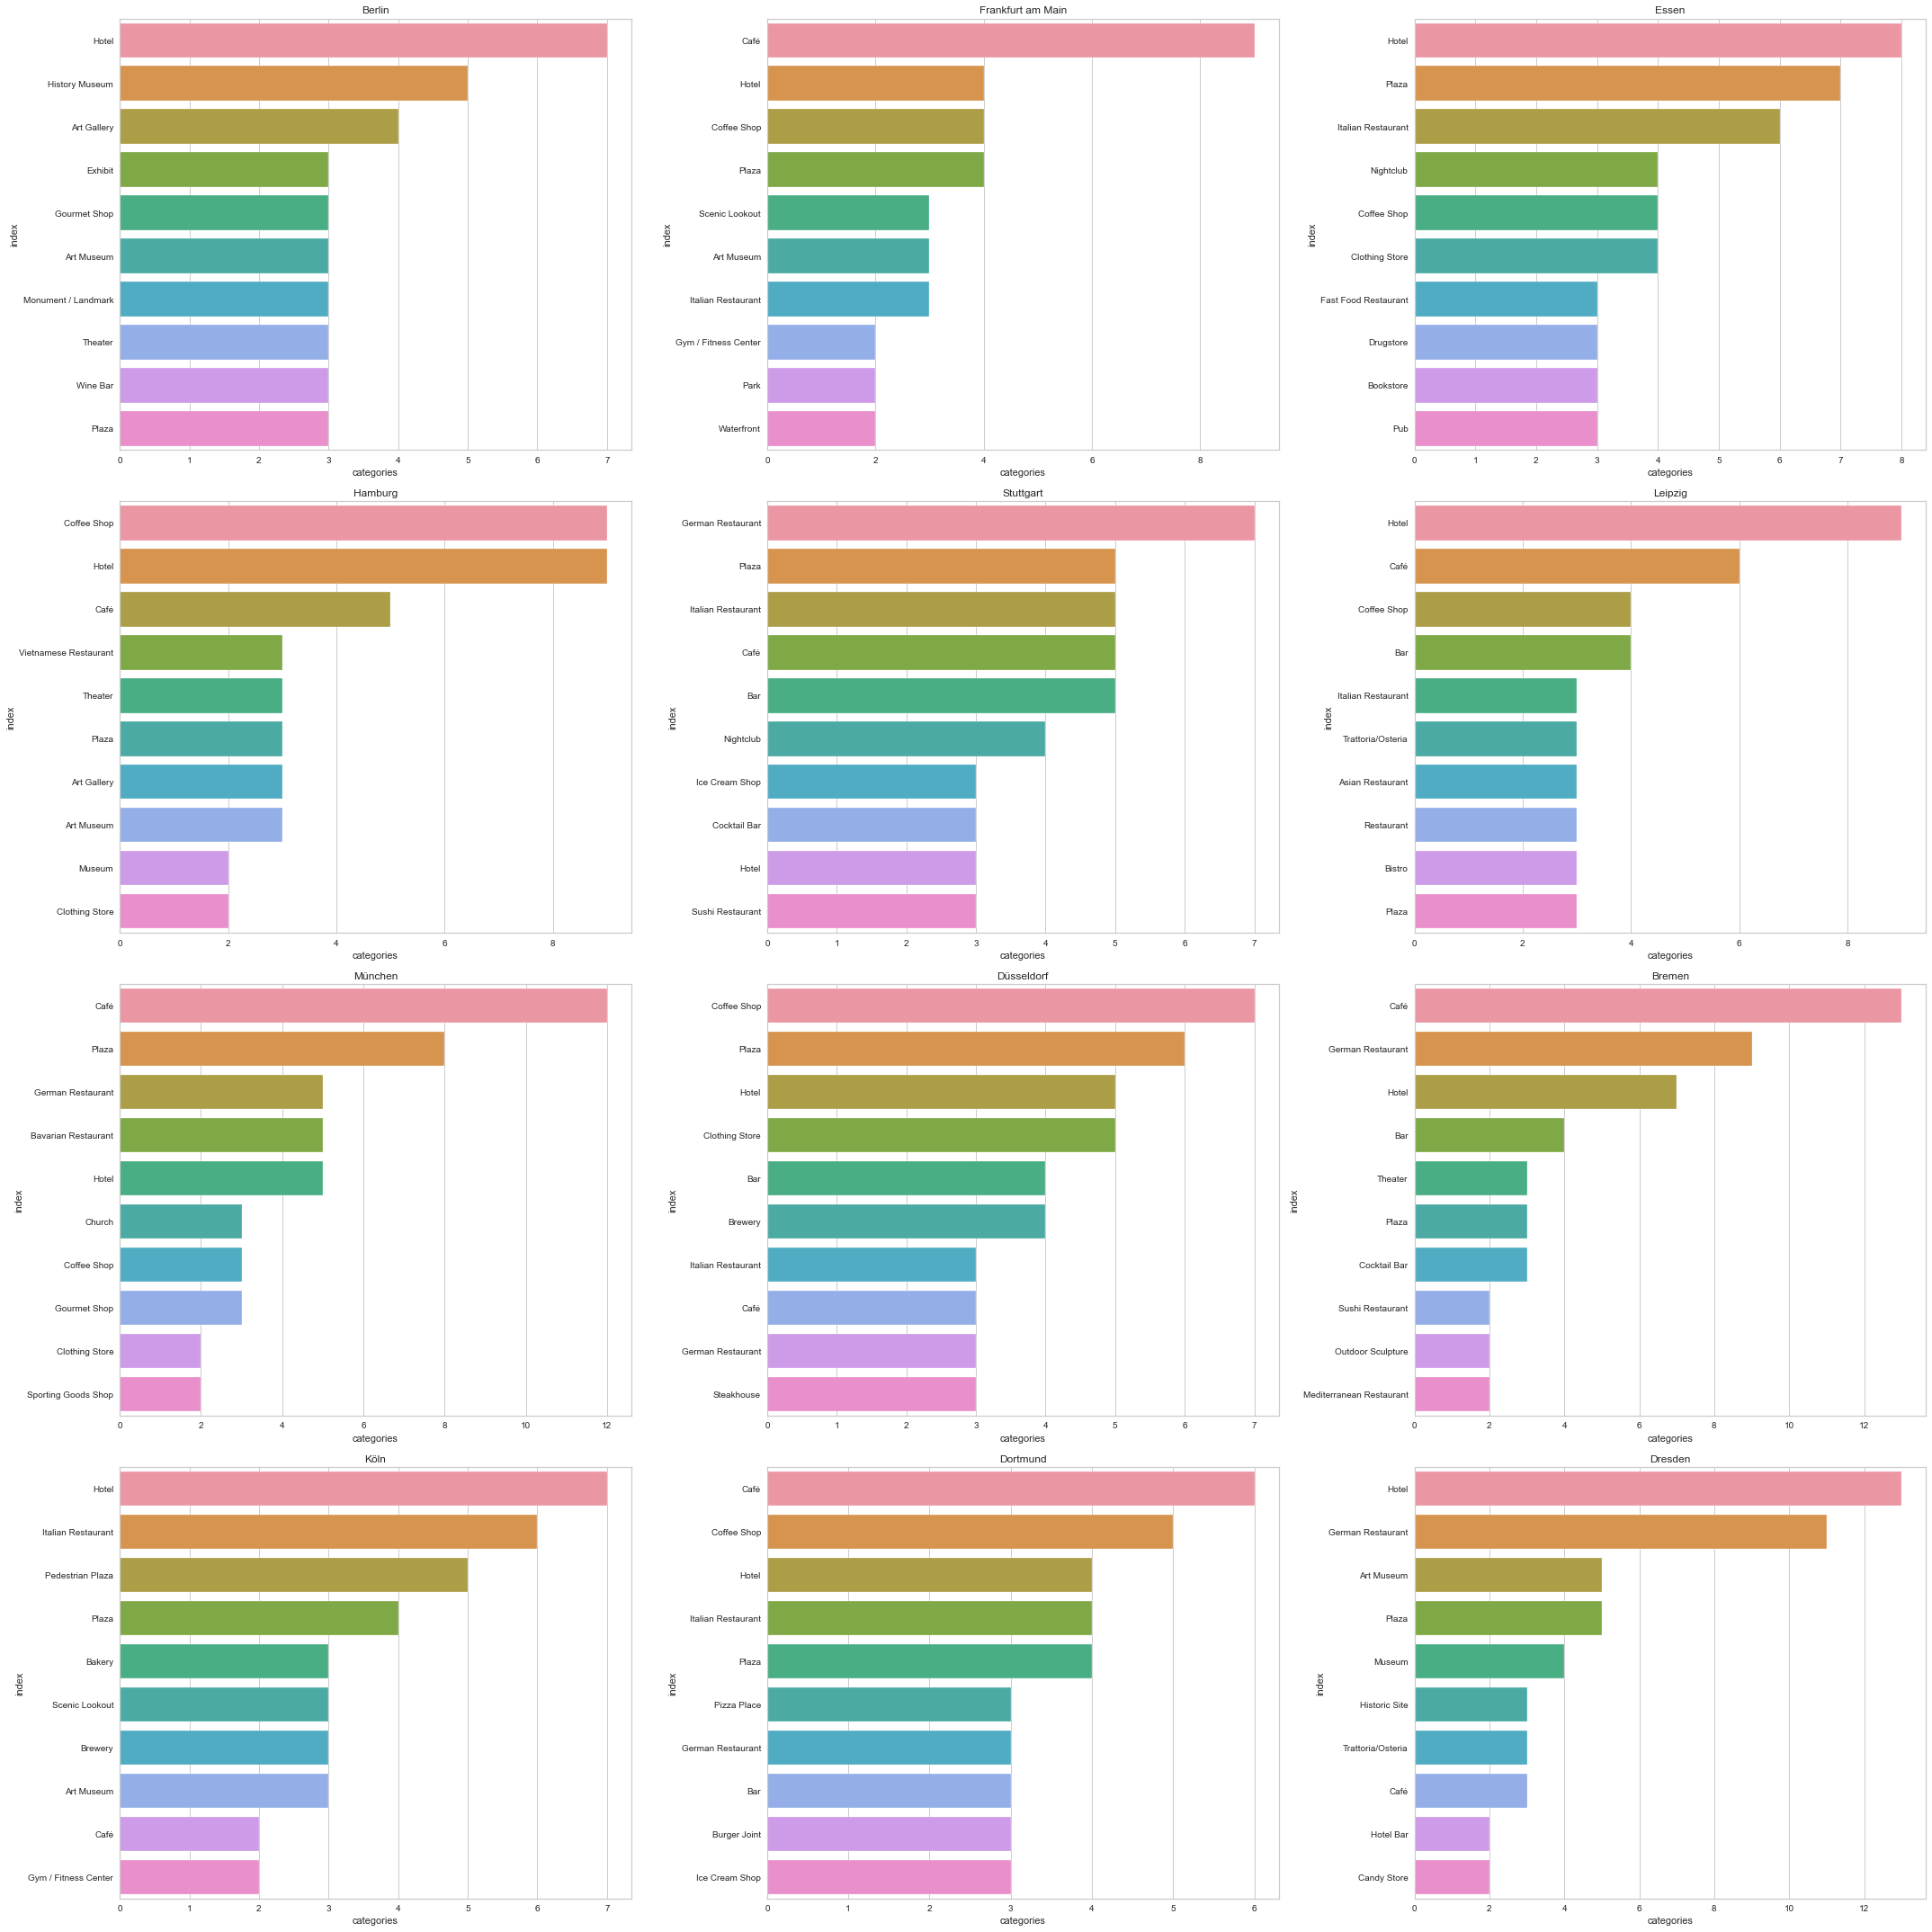

In [31]:
fig1, axs1 = plt.subplots(nrows=4, ncols=3, figsize=(30,30))
count = 0

for i in range(3):
    for j in range(4):
        sns.barplot(y='index',x = 'categories',\
            data=df[df['city']==mylist[count]]['categories'].value_counts().head(10).to_frame().reset_index(),\
                   ax = axs1[j][i])
        axs1[j][i].set_title(mylist[count])
        count += 1

plt.tight_layout()
plt.savefig('categories.png')

In [32]:
df_cross = df.groupby(['city', 'categories']).size().reset_index()

df_cross = df_cross.sort_values(['city',0], ascending=False).reset_index().drop('index', 1)

In [33]:
con = []
for i in mylist:
    a = df_cross[df_cross['city']==i].iloc[:3,:]
    con.append(a)
    
df_c = pd.concat(con)

In [34]:
df_c

,city,categories,0
629,Berlin,Hotel,7
630,Berlin,History Museum,5
631,Berlin,Art Gallery,4
236,Hamburg,Coffee Shop,9
237,Hamburg,Hotel,9
238,Hamburg,Café,5
53,München,Café,12
54,München,Plaza,8
55,München,Bavarian Restaurant,5
168,Köln,Hotel,7


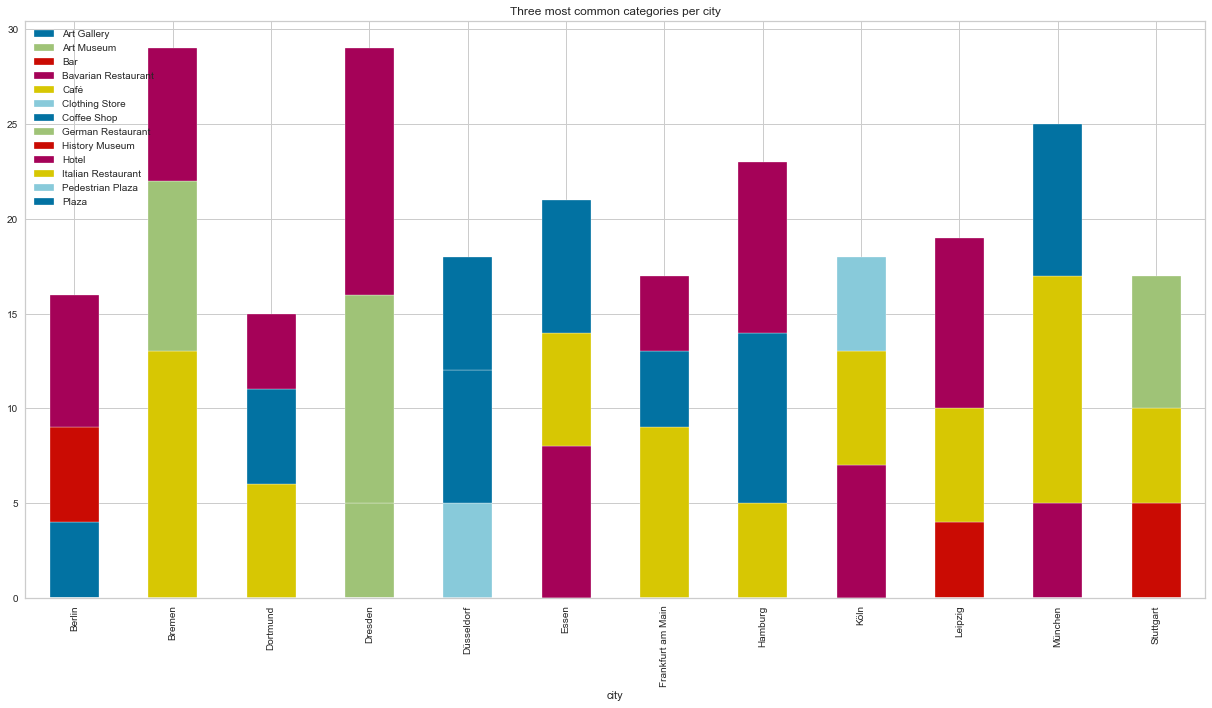

In [41]:

pd.pivot_table(df_c, columns='categories', index='city', values=0)\
.rename_axis(None, axis=1).plot(kind='bar', stacked=True, figsize=(17,10))
plt.legend(loc='upper left')
plt.title('Three most common categories per city')
plt.tight_layout()
plt.savefig('categories_per_city.png')



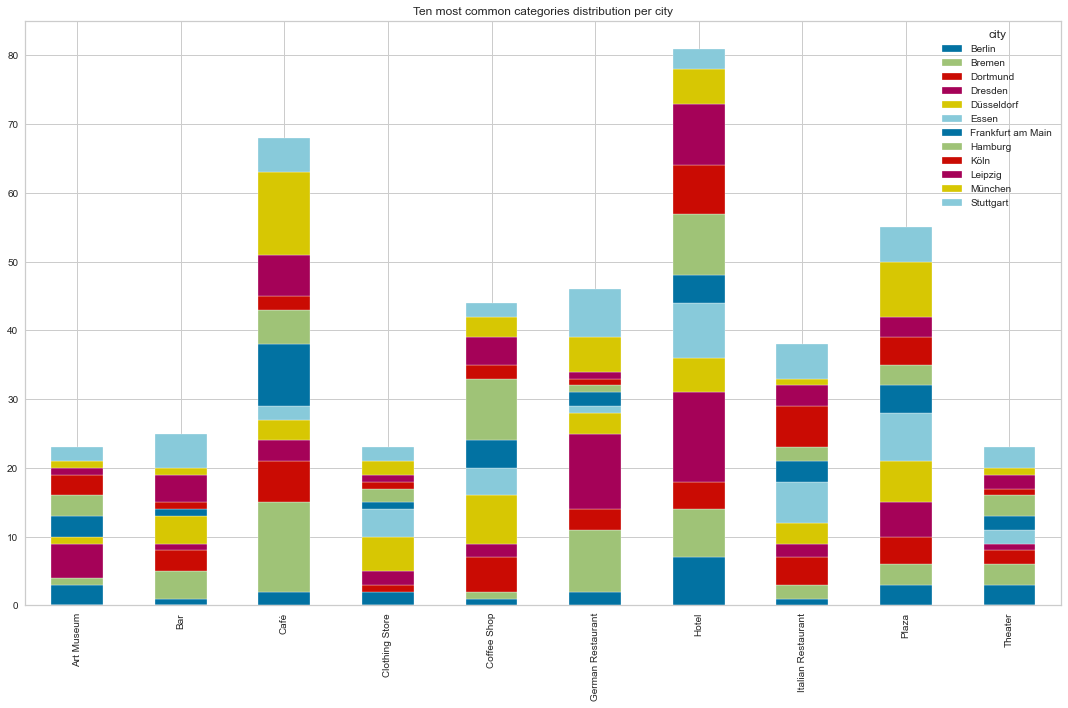

In [42]:
ny =  list(df.categories.value_counts().head(10).index)
df_cat = df[df.categories.isin(df.categories.value_counts().head(10).index)]
df_cat.groupby(["city","categories"]).size().unstack(fill_value=0)\
      .reset_index().rename_axis(None, axis=1).set_index('city').T\
    .plot(kind='bar', stacked=True, figsize = (15,10))
plt.tight_layout()

plt.title('Ten most common categories distribution per city')
plt.tight_layout()
plt.savefig('distribution_per_city.png')

In [44]:
df_similar = df_cross.pivot_table(columns='city', index='categories', values= 0, fill_value=0)

In [47]:
df_cross.city.value_counts()

Köln                 68
Frankfurt am Main    63
Leipzig              62
Dortmund             60
Hamburg              59
Berlin               58
Bremen               56
Stuttgart            53
München              53
Essen                53
Düsseldorf           52
Dresden              49
Dresden-Altstadt      1
Name: city, dtype: int64

In [50]:
df_similar.Dresden= df_similar.Dresden + df_similar['Dresden-Altstadt']

In [51]:
df_similar.drop(inplace=True, columns='Dresden-Altstadt')
df_similar

city,Berlin,Bremen,Dortmund,Dresden,Düsseldorf,Essen,Frankfurt am Main,Hamburg,Köln,Leipzig,München,Stuttgart
categories,,,,,,,,,,,,
Accessories Store,0,0,0,0,0,0,0,1,0,0,0,0
African Restaurant,0,0,0,0,0,0,0,0,0,1,0,2
American Restaurant,0,0,0,0,0,1,0,0,0,0,0,0
Apple Wine Pub,0,0,0,0,0,0,2,0,0,0,0,0
Argentinian Restaurant,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Vegetarian / Vegan Restaurant,1,1,1,1,0,1,1,0,1,0,1,0
Vietnamese Restaurant,0,0,2,0,0,2,1,3,0,1,0,2
Waterfront,0,1,0,0,0,0,2,0,0,0,0,0


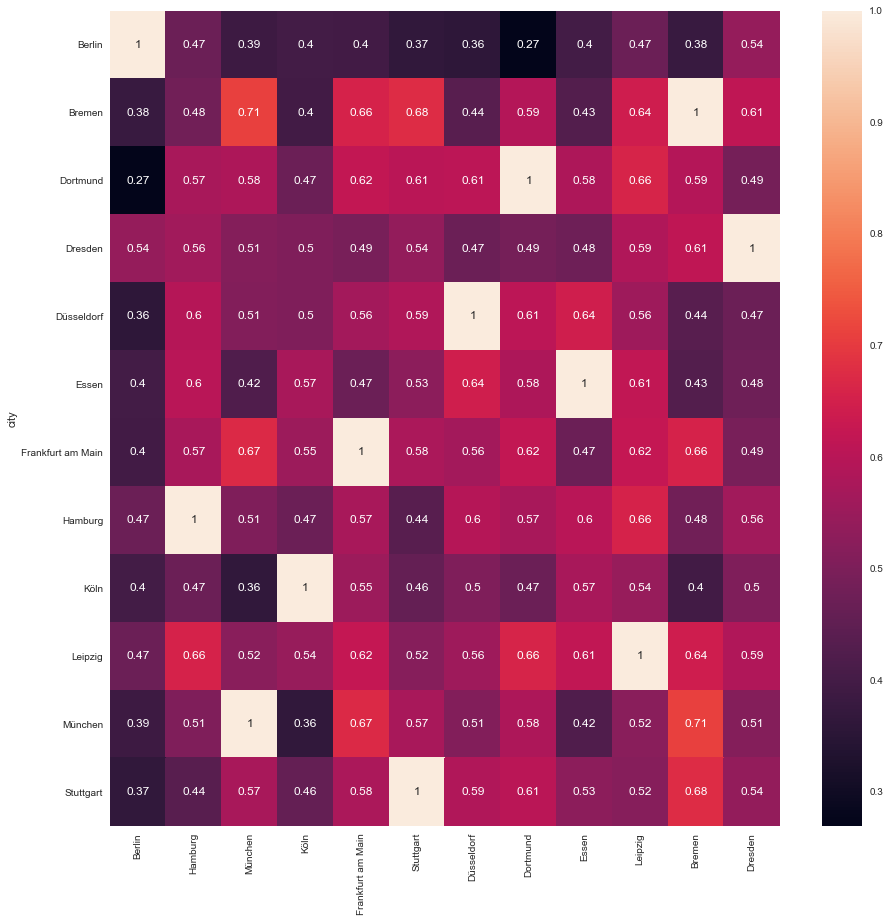

In [59]:
plt.figure(figsize=(15,15))
sim = []
for i in mylist:
    similar_country = df_similar.corrwith(df_similar[i])
    similar_country = pd.DataFrame(similar_country,columns=[f'{i}'])
    similar_country.dropna(inplace=True)
    sim.append(similar_country)
    

sns.heatmap(pd.concat(sim, axis = 1), annot=True )
plt.savefig('heat.png')

In [53]:
pd.concat(sim, axis = 1)

,Berlin,Hamburg,München,Köln,Frankfurt am Main,Stuttgart,Düsseldorf,Dortmund,Essen,Leipzig,Bremen,Dresden
city,,,,,,,,,,,,
Berlin,1.000000,0.469072,0.387925,0.399262,0.395305,0.365106,0.360538,0.269203,0.398764,0.470874,0.379971,0.541251
Bremen,0.379971,0.481381,0.708922,0.395412,0.656076,0.676178,0.435901,0.592665,0.426911,0.640597,1.000000,0.613689
Dortmund,0.269203,0.572395,0.582611,0.471567,0.618206,0.605452,0.607236,1.000000,0.581322,0.659894,0.592665,0.486576
Dresden,0.541251,0.560453,0.513439,0.504631,0.493910,0.538436,0.470932,0.486576,0.475049,0.588326,0.613689,1.000000
Düsseldorf,0.360538,0.595930,0.510736,0.504272,0.563367,0.588712,1.000000,0.607236,0.643369,0.556597,0.435901,0.470932
Essen,0.398764,0.600360,0.421690,0.572395,0.470495,0.527419,0.643369,0.581322,1.000000,0.614670,0.426911,0.475049
Frankfurt am Main,0.395305,0.573863,0.669455,0.551918,1.000000,0.579653,0.563367,0.618206,0.470495,0.622738,0.656076,0.493910
Hamburg,0.469072,1.000000,0.505527,0.469734,0.573863,0.435344,0.595930,0.572395,0.600360,0.655582,0.481381,0.560453
Köln,0.399262,0.469734,0.364250,1.000000,0.551918,0.458528,0.504272,0.471567,0.572395,0.543646,0.395412,0.504631


In [54]:
df_similar[['Berlin','Dresden','Dortmund']][(df_similar[['Berlin','Dresden','Dortmund']] > 0)].dropna()

city,Berlin,Dresden,Dortmund
categories,,,
Bar,1.0,1.0,3.0
Bookstore,2.0,1.0,1.0
Café,2.0,3.0,6.0
Clothing Store,2.0,2.0,1.0
Coffee Shop,1.0,2.0,5.0
German Restaurant,2.0,11.0,3.0
Hotel,7.0,13.0,4.0
Italian Restaurant,1.0,2.0,4.0
Museum,1.0,4.0,2.0
